<a href="https://colab.research.google.com/github/ggauravgupta944/EDA-Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
path='/content/drive/MyDrive/Colab Notebooks/Global Terrorism Data.csv'
gtd_df=pd.read_csv(path, encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [148]:
# Expanding columns...
pd.set_option('display.max_columns', None)

In [149]:
# Expanding rows...
pd.set_option('display.max_rows',None)

In [150]:
gtd_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


<b>Preliminary observation conclude that given data set huge of null values which is not useful for analysis. First we sanitize the dataset and drop the nearly NULL columns.</b>

In [151]:
gtd_df.shape

(181691, 135)

In [152]:
cols_need=['iyear','imonth','iday','country_txt','region_txt','provstate',
           'latitude','longitude','success','suicide','attacktype1_txt',
           'targtype1_txt','target1','natlty1_txt','gname','weaptype1_txt',
           'nkill','nwound','property','ransomamt','dbsource']

In [153]:
gtd_need=gtd_df[cols_need]
gtd_need.head()

iyear  imonth  iday         country_txt                   region_txt  \
0   1970       7     2  Dominican Republic  Central America & Caribbean   
1   1970       0     0              Mexico                North America   
2   1970       1     0         Philippines               Southeast Asia   
3   1970       1     0              Greece               Western Europe   
4   1970       1     0               Japan                    East Asia   

  provstate   latitude   longitude  success  suicide  \
0       NaN  18.456792  -69.951164        1        0   
1   Federal  19.371887  -99.086624        1        0   
2    Tarlac  15.478598  120.599741        1        0   
3    Attica  37.997490   23.762728        1        0   
4   Fukouka  33.580412  130.396361        1        0   

                  attacktype1_txt                targtype1_txt  \
0                   Assassination  Private Citizens & Property   
1     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2                   Assassination          Journalists & Media   
3               Bombing/Explosion      Government (Diplomatic)   
4  Facility/Infrastructure Attack      Government (Diplomatic)   

                   target1         natlty1_txt  \
0             Julio Guzman  Dominican Republic   
1  Nadine Chaval, daughter             Belgium   
2                 Employee       United States   
3             U.S. Embassy       United States   
4           U.S. Consulate       United States   

                                gname weaptype1_txt  nkill  nwound  property  \
0                              MANO-D       Unknown    1.0     0.0         0   
1  23rd of September Communist League       Unknown    0.0     0.0         0   
2                             Unknown       Unknown    1.0     0.0         0   
3                             Unknown    Explosives    NaN     NaN         1   
4                             Unknown    Incendiary    NaN     NaN         1   

   ransomamt dbsource  
0        NaN     PGIS  
1   800000.0     PGIS  
2        NaN     PGIS  
3        NaN     PGIS  
4        NaN     PGIS

In [154]:
gtd_need.shape

(181691, 21)

In [156]:
gtd_need.fillna(0,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [157]:
gtd_need.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181691 non-null  object 
 6   latitude         181691 non-null  float64
 7   longitude        181691 non-null  float64
 8   success          181691 non-null  int64  
 9   suicide          181691 non-null  int64  
 10  attacktype1_txt  181691 non-null  object 
 11  targtype1_txt    181691 non-null  object 
 12  target1          181691 non-null  object 
 13  natlty1_txt      181691 non-null  object 
 14  gname            181691 non-null  object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            181691 non-null  floa

In [158]:
year_df = gtd_need.groupby('iyear')['success'].count().reset_index().rename(columns = {'iyear':'Year', 'success':'Successful Attacks'})

In [159]:
year_need=year_df.set_index('Year')

In [160]:
year_need.head()

Successful Attacks
Year                    
1970                 651
1971                 471
1972                 568
1973                 473
1974                 581

<b>1.Terrorist activities year-wise...</b>

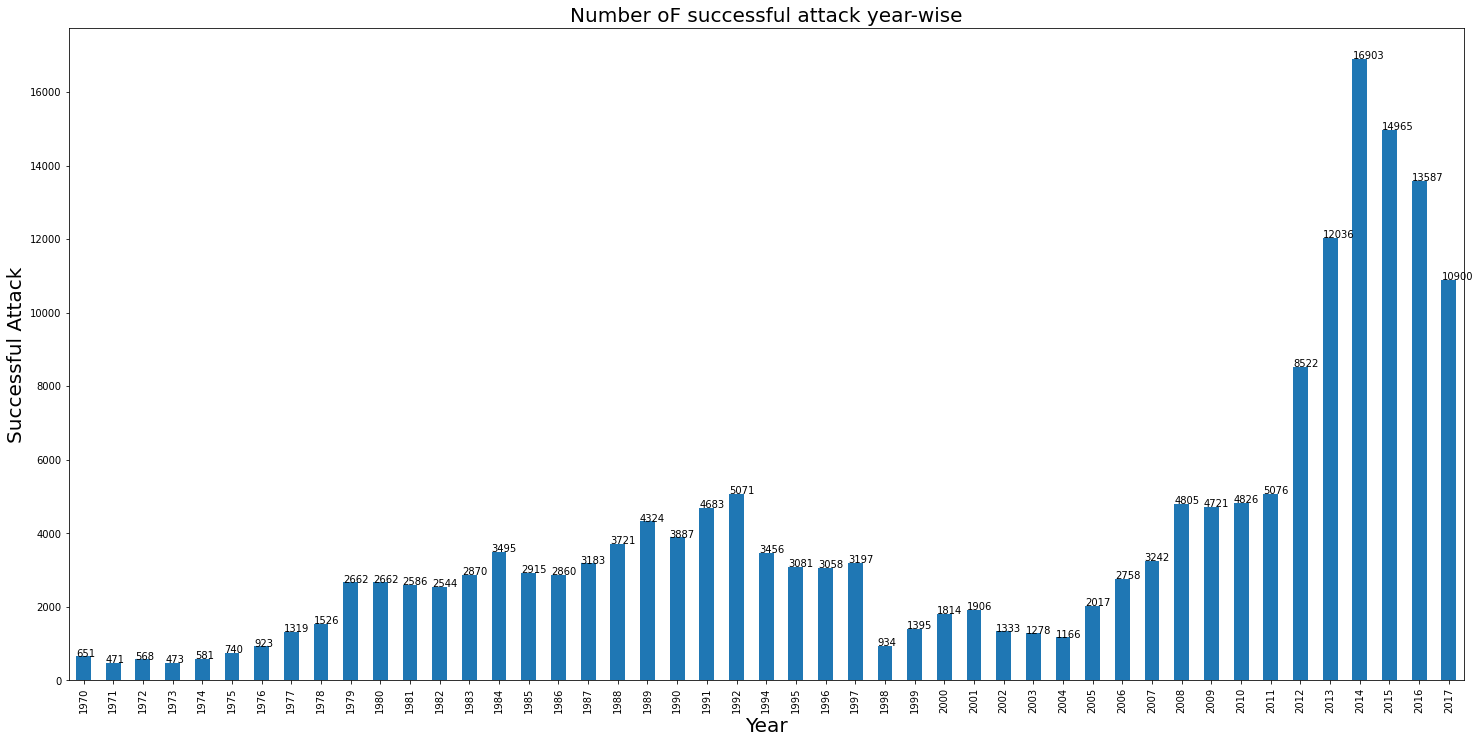

In [161]:
plt.rcParams['figure.figsize'] = (25, 12)
ax=year_need['Successful Attacks'].plot(kind='bar')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Successful Attack',fontsize=20)
plt.title('Number oF successful attack year-wise',fontsize=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x(), p.get_height()))

<b> Conclusion: Year 2014, 2015 and 2016 are top 3 years with most successful attacks.</b>

<b>2 Total affected population (killed + wounded)...</b>

In [162]:
gtd_need.rename(columns={'iyear':'Year','success':'Total Attacks'},inplace=True)
casuality_df = gtd_need.groupby('Year').agg({"Total Attacks":"count",'nkill':'sum',"nwound":"sum"})
casuality_df['Casuality']=casuality_df['nkill']+casuality_df['nwound']
casuality_need=casuality_df[["Total Attacks",'Casuality']]
casuality_need.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Total Attacks  Casuality
Year                          
1970            651      386.0
1971            471      255.0
1972            568      975.0
1973            473      865.0
1974            581     1404.0

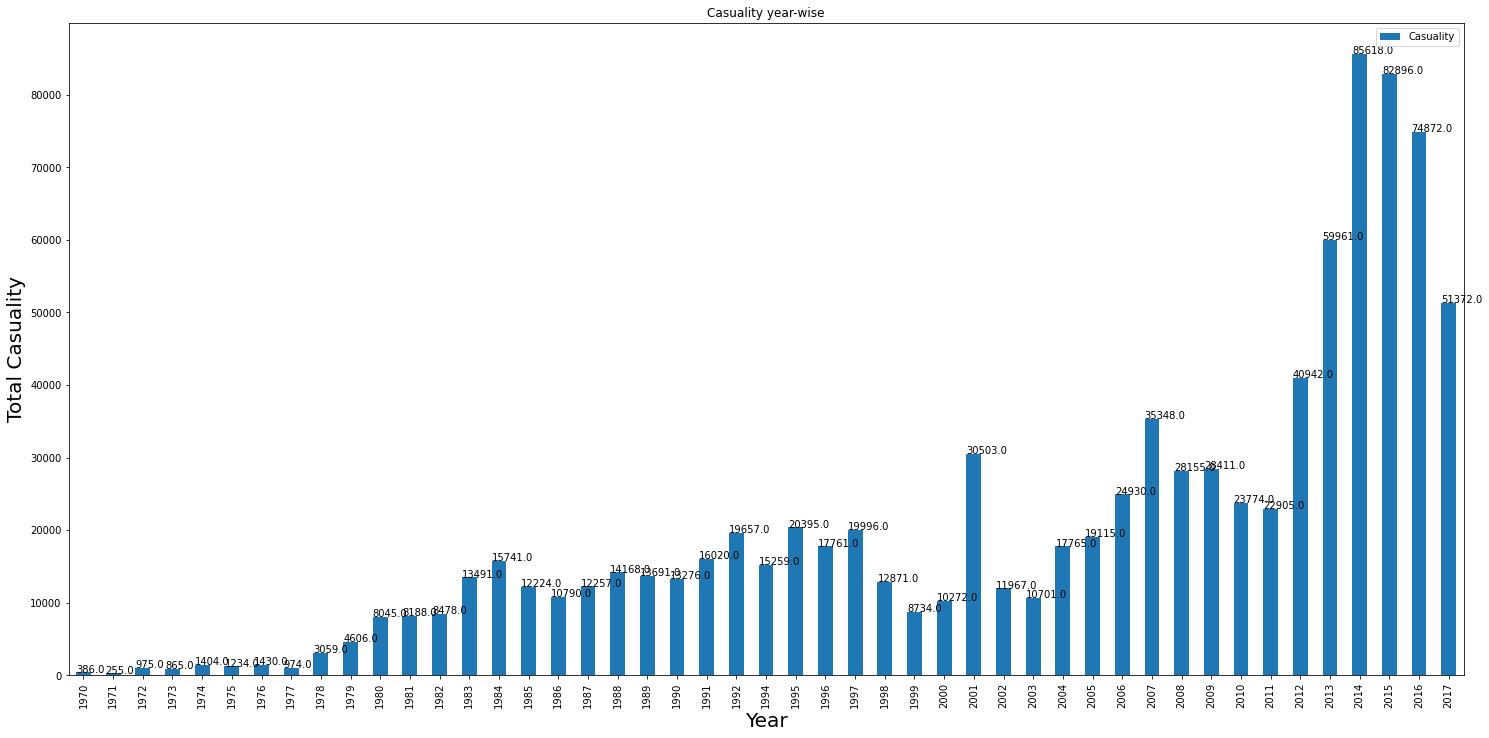

In [164]:
ax=casuality_need[['Casuality']].plot(kind='bar')
plt.title('Casuality year-wise')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total Casuality',fontsize=20)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x(), p.get_height()))

<b>3. Mapping the locations of attacks...</b>

In [191]:
import plotly.express as px

In [195]:
fig = px.scatter_geo(gtd_need,lat='latitude',lon='longitude',hover_name="country_txt")
fig.update_layout(title = 'Attack Locations 1970-2017', title_x=0.5)
fig.show()

<b>Conclusion: Intensity of dots shows that most of the attacks were centered around Middle East and North Africa regions </b>

4.Type of Attack

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data['AttackType'], order=data['AttackType'].value_counts().index, edgecolor='k',palette='rocket')
plt.xlabel('Attack Type',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Type OF Attack', fontweight='bold',fontsize=20)
plt.xticks(rotation = 60)

Maximum Number Of Attack are From Bombing/Explosion and Armed Assault

5.Type of Target

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data['Target_type'], order=data['Target_type'].value_counts().index, edgecolor='k',palette='hot')
plt.xlabel('Target type',fontweight='bold')
plt.ylabel('Number Of Attack',fontweight='bold')
plt.title('Target type', fontweight='bold',fontsize=20)
plt.xticks(rotation = 90)

The Main Target of Terrorist is Private Citizens&Property and Military.

6.Most Active Terrorrist Groups

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(y=data['Group'].value_counts()[1:10].index,x=data['Group'].value_counts()[1:10].values,
           palette='copper',edgecolor='k')
plt.xlabel('Number of Attack',fontweight='bold',fontsize=14)
plt.ylabel('Name of Terrorist Group', fontweight='bold',fontsize=14)
plt.title('Most Active Terrorist Organizations', fontweight='bold',fontsize=18)
plt.show()

Taliban and ISIL are Most Active Terrorist Organisation

7.Total Number of Attack in Each Contry and Region(Top10)

In [ ]:
#plt.figure(figsize=(15,10))
#axes=plt.subplots(nrows=1, ncols=2)
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(y=data['Country'].value_counts()[0:10].index,x=data['Country'].value_counts()[0:10].values,palette='hot', ax=axes[0],edgecolor='k' )
axes[0].set_title('Terrorist Attack per Country',fontweight='bold',fontsize=18)
axes[0].set_xlabel('Number of Attack',fontweight='bold',fontsize=14)
axes[0].set_ylabel('Country', fontweight='bold',fontsize=14)


sns.barplot(y=data['Region'].value_counts()[1:10].index,x=data['Region'].value_counts()[1:10].values,palette='magma',ax=axes[1],edgecolor='k')
axes[1].set_xlabel('Number of Attack',fontweight='bold',fontsize=14)
axes[1].set_ylabel('Region', fontweight='bold',fontsize=14)
axes[1].set_title('Terrorist Attack per Region', fontweight='bold',fontsize=18)
fig.tight_layout()
plt.show()

Maximum Terrorist Activities are in Iraq.

Number People Killed during the attack

In [ ]:
plt.figure(figsize=(25,12))
plt.scatter(data['Year'], data['Killed'], color='b',edgecolor='k')
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Killed',fontweight='bold',fontsize=14)
plt.title('Number People Killed during the attack',fontweight='bold',fontsize=18)
plt.show()

Maximum people died in terrorist attacks in 2014

Number People Wounded during the attack

In [ ]:
plt.figure(figsize=(25,12))
plt.scatter(data['Year'], data['Wounded'], color='b',edgecolor='k')
plt.xlabel('Year',fontweight='bold',fontsize=14)
plt.ylabel('Number Of Wounded',fontweight='bold',fontsize=14)
plt.title('Number People Wounded during the attack',fontweight='bold',fontsize=18)
plt.show()

Conclusion Iraq ranked first on the global terrorism for their terrorist activity followed by Pakistan, Afganistan, India, and so on

Most targeted areas are private citizens and property, military, police, and so on.

Global terror attack deaths rose sharply starting year 2011

In conclusion with the ranking, Iraq suffered from most terrorist attacks in 2014, with the most deaths in that year

Conclusion

Iraq ranked first on global terrorist activity followed by Pakistan, Afghanistan then India and so on.
Most Targeted Areas are Private Citizens&Property, Military,Police and so on.
Global Terror attack rise sharply from 2011 and Maximum Attacks are in 2014 and Maximum people where died in 2014.
Taliban and ISIL are the most active terrorist Groups.